In [1]:
import os 
import skimage.draw
import sys
import numpy as np

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.model import MaskRCNN
from mrcnn.config import Config

DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# Configuration
class InferenceConfig(Config):
    # Give the configuration a recognizable name
    NAME = "watermark"

    # Number of classes (including background)
    NUM_CLASSES = 1 + 2  # Background + watermark + text

    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.5

In [3]:
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

weights_path = '/host/logs/watermark20220104T0604/mask_rcnn_watermark_0030.h5'

config = InferenceConfig()

model = MaskRCNN(mode="inference", config=config,
                                model_dir=DEFAULT_LOGS_DIR)

model.load_weights(weights_path, by_name=True)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Re-starting from epoch 30


In [26]:
img_path = '/host/watermark_detector/Sample.jpg'

image = skimage.io.imread(img_path)

r = model.detect([image], verbose=1)[0]

Processing 1 images
image                    shape: (2048, 1323, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [27]:
r

{'class_ids': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
 'masks': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
 

In [34]:
r['scores']

array([0.9398476 , 0.9000434 , 0.8953345 , 0.89037645, 0.851306  ,
       0.8493638 , 0.84186643, 0.6562657 , 0.6257349 , 0.5453396 ,
       0.5153868 , 0.50520915], dtype=float32)

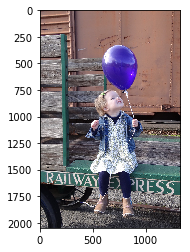

In [28]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [29]:
r['masks'].shape

(2048, 1323, 12)

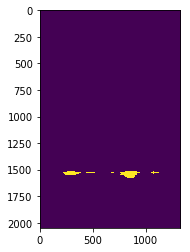

In [30]:
import matplotlib.pyplot as plt

plt.imshow(r['masks'][:,:,0])

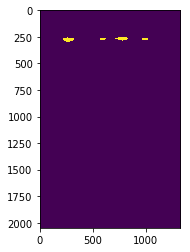

In [31]:
plt.imshow(r['masks'][:,:,1])

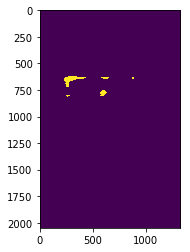

In [32]:
plt.imshow(r['masks'][:,:,2])

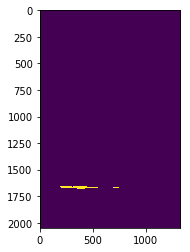

In [33]:
plt.imshow(r['masks'][:,:,3])